# Regression

In [10]:
import pandas as pd
import statsmodels.api as sm

from src.import_data import import_data

For the scope of this tutorial we are going to use AirBnb Scraped data for the city of Bologna. The data is freely available at **Inside AirBnb**: http://insideairbnb.com/get-the-data.html.

A description of all variables in all datasets is avaliable [here](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896).

We are going to use 2 datasets:

- listing dataset: contains listing-level information
- pricing dataset: contains pricing data, over time

In [11]:
df_listings, df_prices, df = import_data()

## OLS Regression

We can use the `statsmodels` package (`sm` in short) to estimate a linear regression, with the OLS package.

In [22]:
est = sm.OLS.from_formula('price ~ review_scores_rating', df).fit()

The first table contains the estimation results.

In [23]:
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,468.6306,4.374,107.133,0.000,460.057,477.204
review_scores_rating,-68.3729,0.922,-74.157,0.000,-70.180,-66.566


We can add fixed effects as in R

In [46]:
est = sm.OLS.from_formula('price ~ C(neighborhood)', df).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,139.4103,2.136,65.267,0.000,135.224,143.597
C(neighborhood)[T.Navile],24.2554,2.493,9.729,0.000,19.369,29.142
C(neighborhood)[T.Porto - Saragozza],47.6853,2.266,21.047,0.000,43.245,52.126
C(neighborhood)[T.San Donato - San Vitale],-10.0544,2.480,-4.054,0.000,-14.916,-5.193
C(neighborhood)[T.Santo Stefano],-0.9616,2.263,-0.425,0.671,-5.396,3.473
C(neighborhood)[T.Savena],-64.0289,3.159,-20.270,0.000,-70.220,-57.838


To display the coefficients, we have to go through an intermediate step

In [47]:
coef_df = pd.DataFrame({'coef': est.params.values,
                        'err': est.params - est.conf_int()[0],
                        'varname': est.params.index
                       })
coef_df

,coef,err,varname
Intercept,139.410265,4.186482,Intercept
C(neighborhood)[T.Navile],24.255373,4.886331,C(neighborhood)[T.Navile]
C(neighborhood)[T.Porto - Saragozza],47.685297,4.440646,C(neighborhood)[T.Porto - Saragozza]
C(neighborhood)[T.San Donato - San Vitale],-10.054401,4.861457,C(neighborhood)[T.San Donato - San Vitale]
C(neighborhood)[T.Santo Stefano],-0.961594,4.434857,C(neighborhood)[T.Santo Stefano]
C(neighborhood)[T.Savena],-64.028886,6.191171,C(neighborhood)[T.Savena]


Now we can plot the coefficients with the confidence intervals.

<AxesSubplot:xlabel='coef', ylabel='varname'>

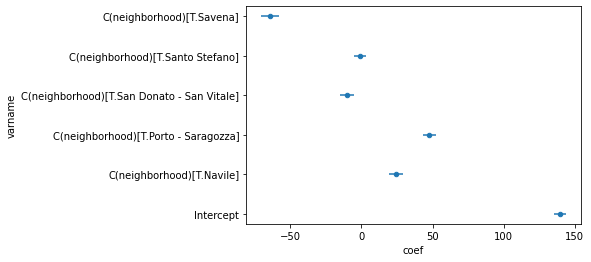

In [48]:
coef_df.plot(x='coef', y='varname', kind='scatter', 
             xerr='err', legend=False)